# Homework

## Dataset

California Housing Prices: [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## EDA

### Load the data

In [2]:
dataset = 'housing.csv'
df = pd.read_csv(dataset)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Look at median_house_value

Does it have a long tail?

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

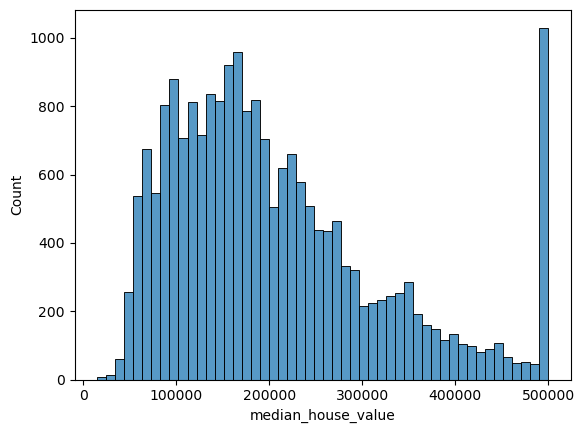

In [3]:
sns.histplot(df.median_house_value, bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

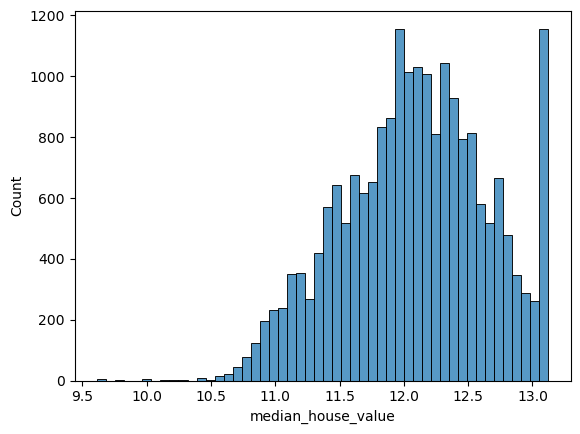

In [4]:
median_house_value_logs = np.log1p(df.median_house_value)
sns.histplot(median_house_value_logs, bins=50)

## Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [5]:
df.drop('ocean_proximity', axis=1, inplace=True)

## Question 1

Find a feature with missing values.
How many missing values does it have?

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

- **207**
- 307
- 408
- 508

## Question 2

What's the median (50% percentile) for variable 'population'?

In [7]:
np.quantile(df['population'], 0.5)

1166.0

- 1133
- 1122
- **1166**
- 1188

## Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [8]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


* Make sure that the target value ('median_house_value') is not in your dataframe.

In [9]:
X_train = df_train.reset_index(drop=True)
X_val = df_val.reset_index(drop=True)
X_test = df_test.reset_index(drop=True)

del X_train['median_house_value']
del X_val['median_house_value']
del X_test['median_house_value']

In [10]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [11]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.

In [12]:
def train_val_test_split(df, seed):
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    X_train = df_train.reset_index(drop=True)
    X_val = df_val.reset_index(drop=True)
    X_test = df_test.reset_index(drop=True)

    del X_train['median_house_value']
    del X_val['median_house_value']
    del X_test['median_house_value']
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    return X_train, y_train, X_val, y_val, X_test, y_test


def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [13]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, 42)

In [14]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


#### Fill in missing values

In [15]:
def prepare_X(X, column, method=0):
    tmp_X = X.copy()
    tmp_X[column] = tmp_X[column].fillna(method)
    return tmp_X.values

In [16]:
X_train_zero = prepare_X(X_train, 'total_bedrooms')
np.isnan(np.sum(X_train_zero))

False

* For computing the mean, use the training only!

In [17]:
x_mean = X_train['total_bedrooms'].mean()
X_train_mean = prepare_X(
    X=X_train, 
    column='total_bedrooms', 
    method=x_mean,
)
np.isnan(np.sum(X_train_mean))

False

#### Linear regression model

In [18]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [19]:
zero_lr = train_linear_regression(X_train_zero, y_train)
mean_lr = train_linear_regression(X_train_mean, y_train)
zero_lr[0], mean_lr[0]

(-11.686975242036949, -11.759590872680977)

* Use the validation dataset to evaluate the models and compare the RMSE of each option.

In [20]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    
    return np.sqrt(mse)

In [21]:
def validate(X_train, column, X_val, x_mean, y_val):
    w0, w = X_train

    X_val = prepare_X(
        X=X_val, 
        column=column, 
        method=x_mean,
    )
    y_pred = w0 + X_val.dot(w)
    
    return rmse(y_val, y_pred)

In [22]:
x_mean = X_train['total_bedrooms'].mean()
score_zero = validate(zero_lr, 'total_bedrooms', X_val, 0, y_val)
score_mean = validate(mean_lr, 'total_bedrooms', X_val, x_mean, y_val)
print(f'{score_zero=}')
print(f'{score_mean=}')

score_zero=0.3295330365228625
score_mean=0.3290195439004073


* Round the RMSE scores to 2 decimal digits using `round(score, 2)`

In [23]:
print(f'Zero: {round(score_zero, 2)}')
print(f'Mean: {round(score_mean, 2)}')

Zero: 0.33
Mean: 0.33


* Which option gives better RMSE?

Options:
- With 0
- With mean
- With median
- **Both are equally good**

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.

In [24]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [25]:
rates = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_lst = {}
for rate in rates:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=rate)

    X_val_prep = prepare_X(X_val, 'total_bedrooms')
    y_pred = w0 + X_val_prep.dot(w)
    rmse_lst[rate] = rmse(y_val, y_pred)
print(rmse_lst)

{0: 0.3295330365228625, 1e-06: 0.32953303616512164, 0.0001: 0.3295330009708059, 0.001: 0.3295327038673664, 0.01: 0.3295319365994488, 0.1: 0.32969472053972504, 1: 0.33378872200060383, 5: 0.3392485345505228, 10: 0.3406063807809532}


* Round the RMSE scores to 2 decimal digits.

In [26]:
for rate, error in rmse_lst.items():
    print(f'{rate:>6}: {round(error, 2)}')

     0: 0.33
 1e-06: 0.33
0.0001: 0.33
 0.001: 0.33
  0.01: 0.33
   0.1: 0.33
     1: 0.33
     5: 0.34
    10: 0.34


* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [27]:
min(rmse_lst)

0

Options:
- **0**
- 0.000001
- 0.001
- 0.0001

## Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.

In [28]:
def cross_val_seeds(seeds):
    errors = {}
    for seed in seeds:
        X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, seed)
        X_train_zero = prepare_X(X_train, 'total_bedrooms')
        zero_lr = train_linear_regression(X_train_zero, y_train)
        errors[seed] = validate(zero_lr, 'total_bedrooms', X_val, 0, y_val)
    return errors

* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

In [29]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seed_errors = cross_val_seeds(seeds)

* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.

In [30]:
deviation = np.std(list(seed_errors.values()))
deviation

0.004170771946611202

* Round the result to 3 decimal digits (`round(std, 3)`)

In [31]:
round(deviation, 3)

0.004

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- **0.005**
- 0.15555

## Question 6

* Split the dataset like previously, use seed 9.

In [32]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(df, 9)

* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.

In [33]:
X_train_zero = prepare_X(X_train, 'total_bedrooms')
X_val_zero = prepare_X(X_val, 'total_bedrooms')
X_train_combo = np.vstack((X_train_zero, X_val_zero))
y_train_combo = np.hstack((y_train, y_val))

zero_lr = train_linear_regression_reg(X_train_combo, y_train_combo, r=0.001)

* What's the RMSE on the test dataset?

In [34]:
round(validate(zero_lr, 'total_bedrooms', X_test, 0, y_test), 2)

0.35

Options:
- **0.35**
- 0.135
- 0.450
- 0.245